# Titanic: Machine Learning from Disaster

## 데이터 소개

  * **Survival** - Survival. 0 = No, 1 = Yes
  * **Pclass** - Ticket class. 1 = 1st, 2 = 2nd, 3 = 3rd
  * **Sex** - Sex.
  * **Age** - Age in years.
  * **SibSp** - # of siblings / spouses aboard the Titanic.
  * **Parch** - # of parents / children aboard the Titanic.
  * **Ticket** - Ticket number.
  * **Fare** - Passenger fare.
  * **Cabin** - Cabin number.
  * **Embarked** - Port of Embarkation. C = Cherbourg, Q = Queenstown, S = Southampton


In [1]:
import numpy as np
import pandas as pd

seed = 37

## 데이터셋 불러오기

In [2]:
train = pd.read_csv("../data/titanic/train.csv", index_col=["PassengerId"])

print(train.shape)
train.head()

(891, 11)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test = pd.read_csv("../data/titanic/test.csv", index_col=["PassengerId"])

print(test.shape)
test.head()

(418, 10)


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## 전처리

### 성별 수치화

In [4]:
train.loc[train["Sex"] == "male", "Sex_encode"] = 0
train.loc[train["Sex"] == "female", "Sex_encode"] = 1

print(train.shape)
train[["Sex", "Sex_encode"]].head()

(891, 12)


,Sex,Sex_encode
PassengerId,,
1,male,0.0
2,female,1.0
3,female,1.0
4,female,1.0
5,male,0.0


In [5]:
test.loc[test["Sex"] == "male", "Sex_encode"] = 0
test.loc[test["Sex"] == "female", "Sex_encode"] = 1


print(test.shape)
test[["Sex", "Sex_encode"]].head()

(418, 11)


,Sex,Sex_encode
PassengerId,,
892,male,0.0
893,female,1.0
894,male,0.0
895,male,0.0
896,female,1.0


### 운임 요금 결측값 넣기

In [6]:
mean_fare = train["Fare"].mean()

print("Fare(Mean) = ${0:.3f}".format(mean_fare))

Fare(Mean) = $32.204


In [7]:
train["Fare_fillin"] = train["Fare"]
test["Fare_fillin"] = test["Fare"]

test.loc[pd.isnull(test["Fare"]), "Fare_fillin"] = mean_fare

missing_fare = test[pd.isnull(test["Fare"])]

print(missing_fare.shape)
test.loc[missing_fare.index, ["Fare", "Fare_fillin"]].head()

(1, 12)


,Fare,Fare_fillin
PassengerId,,
1044,NaN,32.204208


### 배에 승선한 항구 원핫 인코딩

In [8]:
train_embarked = pd.get_dummies(train["Embarked"], prefix="Embarked")

print(train_embarked.shape)
train_embarked.head()

(891, 3)


,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,
1,0,0,1
2,1,0,0
3,0,0,1
4,0,0,1
5,0,0,1


In [9]:
test_embarked = pd.get_dummies(test["Embarked"], prefix="Embarked")

print(test_embarked.shape)
test_embarked.head()

(418, 3)


,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,
892,0,1,0
893,0,0,1
894,0,1,0
895,0,0,1
896,0,0,1


In [10]:
train = pd.concat([train, train_embarked], axis=1)

print(train.shape)
train[["Embarked", "Embarked_C", "Embarked_Q", "Embarked_S"]].head()

(891, 16)


,Embarked,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,
1,S,0,0,1
2,C,1,0,0
3,S,0,0,1
4,S,0,0,1
5,S,0,0,1


In [11]:
test = pd.concat([test, test_embarked], axis=1)

print(test.shape)
test[["Embarked", "Embarked_C", "Embarked_Q", "Embarked_S"]].head()

(418, 15)


,Embarked,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,
892,Q,0,1,0
893,S,0,0,1
894,Q,0,1,0
895,S,0,0,1
896,S,0,0,1


## 학습

In [12]:
feature_names = ["Pclass", "Sex_encode", "Fare_fillin",
                 "Embarked_C", "Embarked_Q", "Embarked_S"]

X_train = train[feature_names]

print(X_train.shape)
X_train.head()

(891, 6)


,Pclass,Sex_encode,Fare_fillin,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,
1,3,0.0,7.2500,0,0,1
2,1,1.0,71.2833,1,0,0
3,3,1.0,7.9250,0,0,1
4,1,1.0,53.1000,0,0,1
5,3,0.0,8.0500,0,0,1


In [13]:
label_name = "Survived"

y_train = train[label_name]

print(y_train.shape)
y_train.head()

(891,)


PassengerId
1    0
2    1
3    1
4    1
5    0
Name: Survived, dtype: int64

In [14]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=5,
                               random_state=seed)

In [15]:
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=37,
            splitter='best')

## 시각화

In [17]:
# Warning: You should install 1) graphviz and 2) pydot before run these codes.
# Graphviz - http://www.graphviz.org/Download.php
# Pydot - https://github.com/erocarrera/pydot
from sklearn.tree import export_graphviz
import graphviz



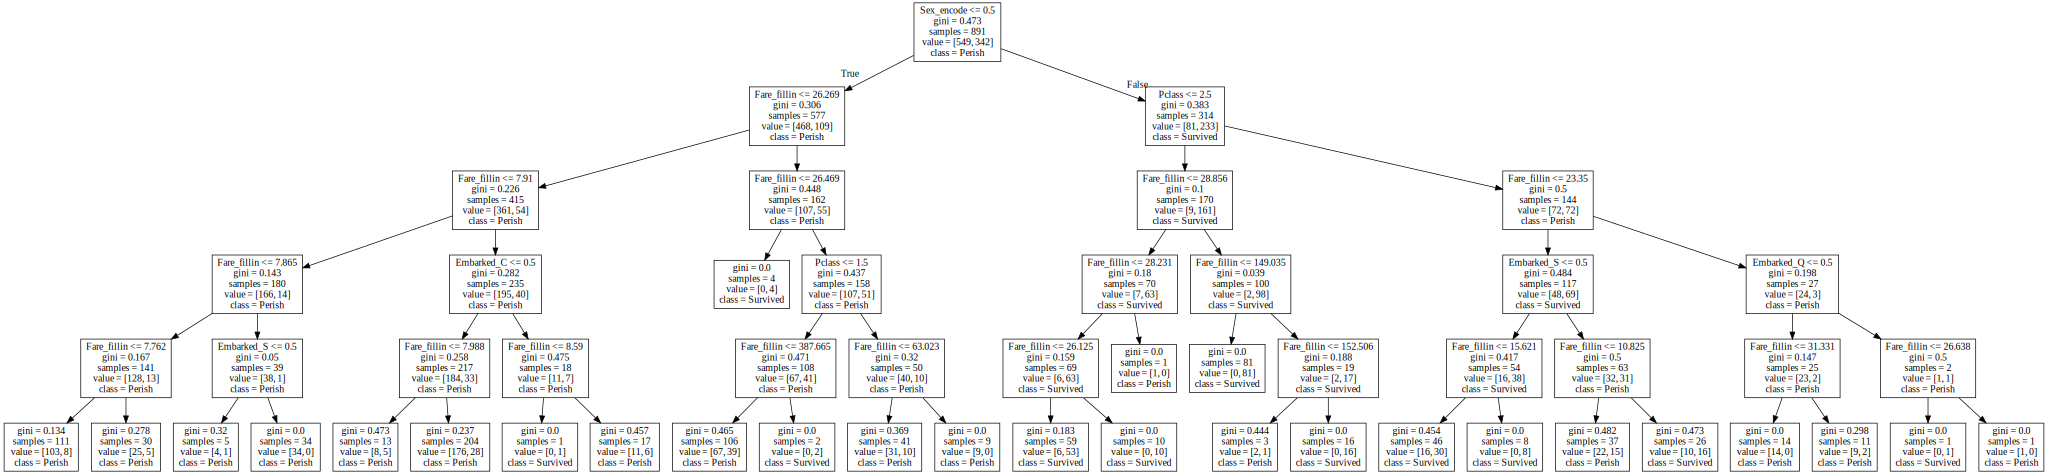

In [19]:
export_graphviz(model,
                feature_names=feature_names,
                class_names=["Perish", "Survived"],
                out_file="images/decision-tree.dot")

with open("images/decision-tree.dot") as f:
    dot_graph = f.read()
    
graphviz.Source(dot_graph)

## 예측

In [20]:
X_test = test[feature_names]

print(X_test.shape)
X_test.head()

(418, 6)


,Pclass,Sex_encode,Fare_fillin,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,
892,3,0.0,7.8292,0,1,0
893,3,1.0,7.0000,0,0,1
894,2,0.0,9.6875,0,1,0
895,3,0.0,8.6625,0,0,1
896,3,1.0,12.2875,0,0,1


In [21]:
prediction = model.predict(X_test)

print(prediction.shape)
prediction[:20]

(418,)


array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1])

In [25]:
%nbtutor

ERROR:root:Line magic function `%nbtutor` not found.
